In [11]:
#note the example data may be formatted differently from the actual data and might not work 
#unless data of the correct format is used.

#ExampleDataC can be found at
#https://www.sciencedirect.com/science/article/pii/S0360544216311744?via%3Dihub

#this script will use the RadCam's half-hourly energy usage 
#to plot data so our group can gather more information on
#the scale of energy usage the RadCam and OldBod use

import os
import xlrd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datetime

In [15]:
#import the RadCam Electricity Half hour data

df = pd.read_csv("C:\\Users\\Michael\\OneDrive - Nexus365\\LEO\\3YP Coding\\Electricity Modelling\\Electricity Modelling\\ExampleDataC.csv",)
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df = df.sort_values(by="Date")
df.head()
df.sum()

00:30        3799.0
01:00        3854.0
01:30        3856.0
02:00        3820.5
02:30        3743.5
03:00        3748.0
03:30        3798.0
04:00        3790.0
04:30        3788.0
05:00        3860.0
05:30        3790.0
06:00        3858.0
06:30        4762.0
07:00        9285.0
07:30       13737.0
08:00       15440.0
08:30       16942.0
09:00       20504.0
09:30       21965.0
10:00       23627.0
10:30       25114.0
11:00       25936.0
11:30       26693.0
12:00       27061.0
12:30       27233.0
13:00       26862.0
13:30       26772.0
14:00       27097.0
14:30       27640.0
15:00       27770.0
15:30       27706.0
16:00       26618.0
16:30       25090.0
17:00       24240.0
17:30       22696.0
18:00       20938.0
18:30       19366.0
19:00       16277.0
19:30       12764.0
20:00       12002.0
20:30       11789.0
21:00       11410.0
21:30       10870.0
22:00        8631.0
22:30        4832.0
23:00        4283.0
23:30        4029.0
24:00:00     3838.0
dtype: float64

In [14]:
#adds a column that gives the electricity used each day
df['Daily Sum'] = df.sum(axis=1)
df.head()


SystemError: <class 'TypeError'> returned a result with an error set

In [4]:
#split dataframe into separate years

df_2016 = df[df['Date'].dt.year == 2016] 
df_2017 = df[df['Date'].dt.year == 2017] 
df_2018 = df[df['Date'].dt.year == 2018] 
df_2019 = df[df['Date'].dt.year == 2019] 
df_2020 = df[df['Date'].dt.year == 2020] 
df_2020
#now find daily total from each year
df_2016_dt = df_2016['Daily Sum'] 
df_2017_dt = df_2017['Daily Sum'] 
df_2018_dt = df_2018['Daily Sum'] 
df_2019_dt = df_2019['Daily Sum'] 
df_2020_dt = df_2020['Daily Sum'] 

KeyError: 'Daily Sum'

In [5]:
#create arrays for each year's daily expenditure

array2016 = np.zeros(len(df_2016))

for i,j in enumerate(df_2016_dt,0):
    array2016[i] = j
    
array2017 = np.zeros(len(df_2017))
for i,j in enumerate(df_2017_dt,0):
    array2017[i] = j
    
    
array2018 = np.zeros(len(df_2018))
for i,j in enumerate(df_2018_dt,0):
    array2018[i] = j
    
    
array2019 = np.zeros(len(df_2019))
for i,j in enumerate(df_2019_dt,0):
    array2019[i] = j
    
    
array2020 = np.zeros(len(df_2020))
for i,j in enumerate(df_2020_dt,0):
    array2020[i] = j
    

NameError: name 'df_2016_dt' is not defined

In [6]:
#create x axis for each year

x2016 = len(df_2016)
xaxis2016 = list(range(0,x2016))

x2017 = len(df_2017)
xaxis2017 = list(range(0,x2017))

x2018 = len(df_2018)
xaxis2018 = list(range(0,x2018))

x2019 = len(df_2019)
xaxis2019 = list(range(0,x2019))

x2020 = len(df_2020)
xaxis2020 = list(range(0,x2020))

NameError: name 'array2017' is not defined

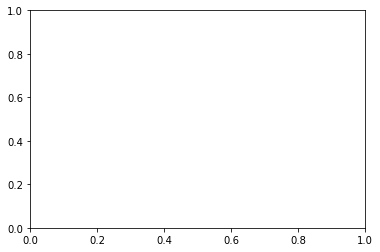

In [7]:
#plot the results
xaxis = range(1,366)
month_starts = [1,32,61,92,122,153,183,214,245,275,306,336]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 


%matplotlib inline
fig, ax = plt.subplots()

ax.plot(xaxis,array2017,label = '2017')
#plt.plot(xaxis,array2017,label = '2017')
ax.plot(xaxis,array2018,label = '2018')
ax.plot(xaxis,array2019,label = '2019')

#plt.plot(xaxis2020,array2020,label = '2020')

ax.set_xticks(month_starts)
ax.set_xticklabels(month_names)
plt.xlabel('Day of the year')
plt.ylabel('Total daily energy (kWh)')
plt.legend()

In [8]:
#Now calculate the 7 day average to smooth off this interesting but messy graph.
for i in range(4,x2017-4):
    array2017[i] = (1/9)*(array2017[i-4]+array2017[i+4]+array2017[i-3]+array2017[i-2]+array2017[i-1]+array2017[i]+array2017[i+1]+array2017[i+2]+array2017[i+3])

#have 1st 4 and last 4 points equal to the first recorded 9 day average
    
for j in range(0,3):
    array2017[j] = array2017[4]
for j in range(x2017-3,x2017):
    array2017[j] = array2017[x2017-4]
    
for i in range(4,x2018-4):
    array2018[i] = (1/9)*(array2018[i-4]+array2018[i+4]+array2018[i-3]+array2018[i-2]+array2018[i-1]+array2018[i]+array2018[i+1]+array2018[i+2]+array2018[i+3])
for j in range(0,3):
    array2018[j] = array2018[4]
for j in range(x2018-3,x2018):
    array2018[j] = array2018[x2018-4]
    

for i in range(4,x2019-4):
    array2019[i] = (1/9)*(array2019[i-4] + array2019[i+4] + array2019[i-3]+array2019[i-2]+array2019[i-1]+array2019[i]+array2019[i+1]+array2019[i+2]+array2019[i+3])
for j in range(0,3):
    array2019[j] = array2019[4]
for j in range(x2019-3,x2019):
    array2019[j] = array2019[x2019-4]
    
for i in range(4,x2020-4):
    array2020[i] = (1/9)*(array2020[i-4]+array2020[i+4]+array2020[i-3]+array2020[i-2]+array2020[i-1]+array2020[i]+array2020[i+1]+array2020[i+2]+array2020[i+3])
for j in range(0,3):
    array2020[j] = array2020[4]
for j in range(x2020-3,x2020):
    array2020[j] = array2020[x2020-4]

In [9]:
dayarray2019 = np.zeros(len(df_2019))
for i,j in enumerate(df_2019_dt,0):
    dayarray2019[i] = j

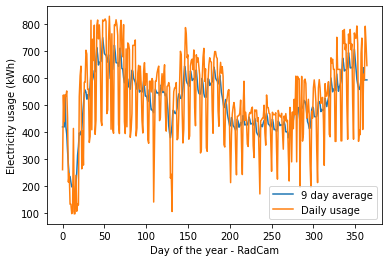

In [10]:
%matplotlib inline
plt.plot(xaxis2019,array2019,label = '9 day average')
plt.plot(xaxis2019,dayarray2019,label = 'Daily usage')


plt.xlabel('Day of the year - RadCam')
plt.ylabel('Electricity usage (kWh)')
plt.legend()
plt.savefig('RadCam_DailyVsAverage.png')

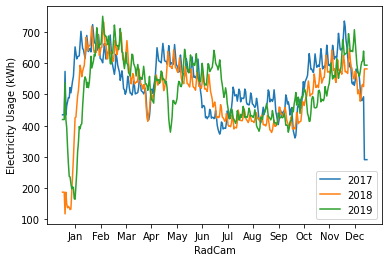

In [15]:
%matplotlib inline

plt.plot(xaxis2017,array2017,label = '2017')
plt.plot(xaxis2018,array2018,label = '2018')
plt.plot(xaxis2019,array2019,label = '2019')
#plt.plot(xaxis2020,array2020,label = '2020')
plt.xticks(np.linspace(15,380,13)[:-1], ('Jan', 'Feb' ,'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct', 'Nov', 'Dec'))
plt.xlabel('RadCam')
plt.ylabel('Electricity Usage (kWh)')
plt.legend()
plt.savefig('RadCam_Average+.png')

In [12]:
#extracting May2019 from the dataframe

May2019 = df[902:932]
May2019 = May2019['Daily Sum']
xmay = list(range(0,30))

len( May2019)

30

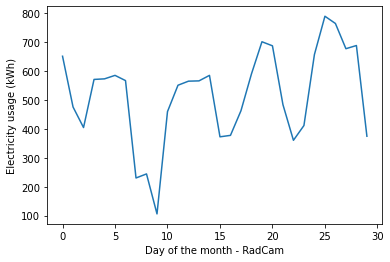

In [13]:
#plotting each day in May 2019

%matplotlib inline

plt.plot(xmay,May2019,label = 'Daily')
#plt.plot(xmay,May2019Average,label = 'Rolling average')


plt.xlabel('Day of the month - RadCam')
plt.ylabel('Electricity usage (kWh)')
plt.savefig('RadCam_Month.png')
#plt.legend()